In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [166]:
df=pd.read_excel('C:/Users/fatca/OneDrive/Desktop/Reunification Re-entry Project Update 12-4-19_cleanedNmerged.xlsx')

# Data Exploration

In [167]:
df.columns

Index(['Reentered', 'OriginalRow', 'dupe_caseNum', 'Age_Youth',
       'A_Remove_Date', 'B_Reunion_Date', 'LOS_Before_Reunion_TOTAL',
       'LOS_Before_Reunion_IMMED', 'DC_reason', 'C_Reenter_Date',
       'LOS_Before_Reenter', 'Age_Parent', 'Married_Parent', 'SA_either',
       'SA_mom', 'SA_dad', 'SA_asterisk', 'abuse_either', 'abuse_mom',
       'abuse_dad', 'abuse_asterisk', 'Fostered_Parent', 'Fostered_asterisk',
       'Kids_In_Home', 'Staff_Before_Reun', 'Staff_After_Reun', 'FR_team',
       'Plmt_Type', 'Comments'],
      dtype='object')

In [85]:
df.head()

,Reentered,OriginalRow,dupe_caseNum,Age_Youth,A_Remove_Date,B_Reunion_Date,LOS_Before_Reunion_TOTAL,LOS_Before_Reunion_IMMED,DC_reason,C_Reenter_Date,...,abuse_asterisk,Fostered_Parent,Fostered_asterisk,Kids_In_Home,Staff_Before_Reun,Staff_After_Reun,FR_team,Plmt_Type,Comments,Age_Youth2
0,0,41,no case number provided,6,2018-04-13,2018-04-24,11,11,Reunification w/ Parent(s)/Prima,NaT,...,0,0,1,3,1,2,0,Relative,*FFA indicates that the mother was sexually an...,6
1,0,42,no case number provided,11,2018-05-10,2018-06-02,23,21,Reunification w/ Parent(s)/Prima,NaT,...,0,0,1,4,1,1,0,Relative,*FFA indicates that the mother and father both...,11
2,0,43,no case number provided,9,2018-03-12,2018-04-05,24,21,Reunification w/ Parent(s)/Prima,NaT,...,0,0,1,3,2,2,0,Relative,*FFA indicates that the mother was adopted as ...,9
3,0,44,no case number provided,2,2017-09-25,2017-11-03,39,30,Reunification w/ Parent(s)/Prima,NaT,...,0,0,1,1,1,2,1,Family foster home,*FFA indicates that the mother witnessed DV as...,2
4,0,45,no case number provided,9,2018-06-22,2018-08-03,42,30,Reunification w/ Parent(s)/Prima,NaT,...,0,0,0,2,3,1,0,Family foster home,NaN,9


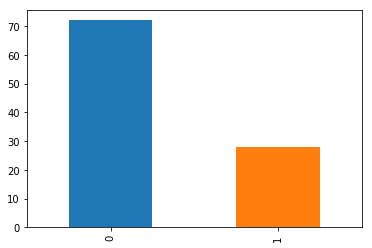

In [18]:
df['Reentered'].value_counts().plot(kind="bar")
plt.show()

In [21]:
df['OriginalRow'].value_counts() #this can be dropped.  This is the original row number
#plt.show()

510    1
303    1
26     1
27     1
540    1
548    1
41     1
42     1
43     1
44     1
45     1
46     1
48     1
501    1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
312    1
313    1
314    1
25     1
24     1
535    1
22     1
1      1
2      1
      ..
305    1
306    1
491    1
307    1
415    1
153    1
328    1
388    1
346    1
86     1
87     1
602    1
99     1
100    1
108    1
12     1
623    1
300    1
370    1
371    1
372    1
376    1
301    1
302    1
131    1
132    1
133    1
395    1
148    1
0      1
Name: OriginalRow, Length: 100, dtype: int64

In [23]:
df['dupe_caseNum'].value_counts() #looks like I need to remove some duplicates

no case number provided      85
Duplicate case #101285977     4
Duplicate case #2680303       4
Duplicate case #101206620     3
Duplicate case #100754538     2
Duplicate case #101504373     2
Name: dupe_caseNum, dtype: int64

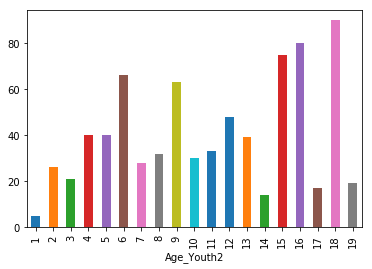

In [103]:
df1=df
df1['Age_Youth2']=df1['Age_Youth']
df1.groupby(['Age_Youth2'])['Age_Youth'].sum().plot(kind='bar')
plt.show()
#lots more than I expected at the age of 15, 16, 18, and 2,4

[]

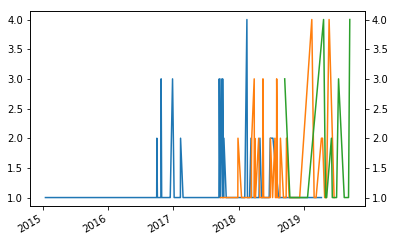

In [162]:
fig, ax =plt.subplots()
df['A_Remove_Date'].value_counts().plot(kind='line')
df['B_Reunion_Date'].value_counts().plot(kind='line', secondary_y=True)
df['C_Reenter_Date'].value_counts().plot(kind='line',secondary_y=True)
plt.plot()

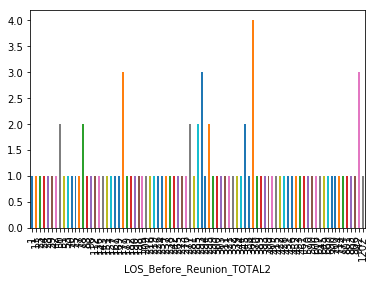

364     4
293     3
177     3
942     3
78      2
50      2
345     2
295     2
277     2
285     2
169     1
399     1
294     1
39      1
299     1
645     1
42      1
415     1
300     1
265     1
303     1
51      1
436     1
422     1
28      1
461     1
157     1
389     1
339     1
590     1
       ..
237     1
774     1
238     1
198     1
112     1
370     1
883     1
690     1
801     1
216     1
167     1
1202    1
453     1
226     1
700     1
190     1
1       1
321     1
151     1
344     1
70      1
83      1
199     1
431     1
714     1
75      1
332     1
77      1
179     1
428     1
Name: LOS_Before_Reunion_TOTAL2, Length: 85, dtype: int64

In [144]:
# df['LOS_Before_Reunion_TOTAL'].value_counts()
df2=df
df2['LOS_Before_Reunion_TOTAL2']=df2['LOS_Before_Reunion_TOTAL']
df2a=df2.groupby(['LOS_Before_Reunion_TOTAL2'])['LOS_Before_Reunion_TOTAL'].count().plot(kind='bar')
plt.show()
df2.LOS_Before_Reunion_TOTAL2.value_counts()
#maxes of 364 days, 293 days, 177 days, 942 days, 

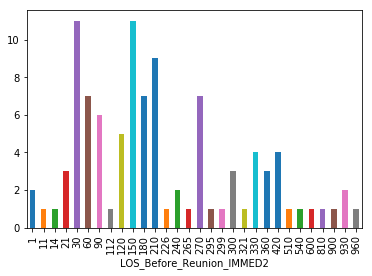

364     4
293     3
177     3
942     3
78      2
50      2
345     2
295     2
277     2
285     2
169     1
399     1
294     1
39      1
299     1
645     1
42      1
415     1
300     1
265     1
303     1
51      1
436     1
422     1
28      1
461     1
157     1
389     1
339     1
590     1
       ..
237     1
774     1
238     1
198     1
112     1
370     1
883     1
690     1
801     1
216     1
167     1
1202    1
453     1
226     1
700     1
190     1
1       1
321     1
151     1
344     1
70      1
83      1
199     1
431     1
714     1
75      1
332     1
77      1
179     1
428     1
Name: LOS_Before_Reunion_TOTAL2, Length: 85, dtype: int64

In [157]:
df3=df
df3['LOS_Before_Reunion_IMMED2']=df3['LOS_Before_Reunion_IMMED']
df3a=df2.groupby(['LOS_Before_Reunion_IMMED2'])['LOS_Before_Reunion_IMMED'].count().plot(kind='bar')
plt.show()
df3.LOS_Before_Reunion_TOTAL2.value_counts()

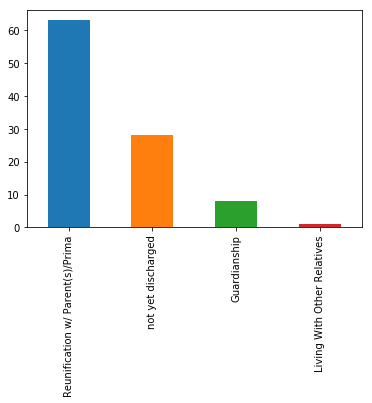

In [160]:
df.DC_reason.value_counts().plot(kind='bar')
plt.show()

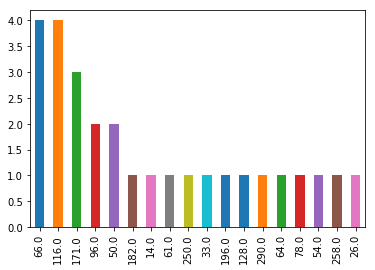

In [163]:
df['LOS_Before_Reenter'].value_counts().plot(kind='bar')

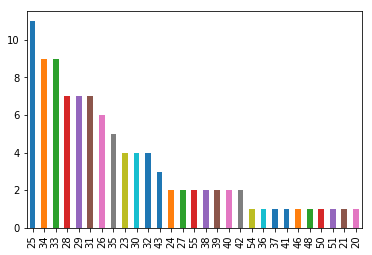

In [165]:
df['Age_Parent'].value_counts().plot(kind='bar')
plt.show()

In [168]:
df.Married_Parent.value_counts()

0    83
1    17
Name: Married_Parent, dtype: int64

In [171]:
df.SA_either.value_counts()

1    53
0    47
Name: SA_either, dtype: int64

In [172]:
df.SA_dad.value_counts()

0    64
1    36
Name: SA_dad, dtype: int64

In [173]:
df.SA_mom.value_counts()

0    68
1    32
Name: SA_mom, dtype: int64

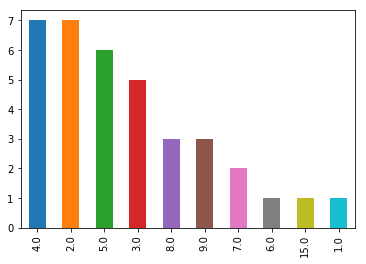

In [175]:
df.abuse_mom.value_counts().plot(kind='bar') #what does this mean?????  What is a 4?  What is a 2?  Is that instances of abuse?
plt.show()

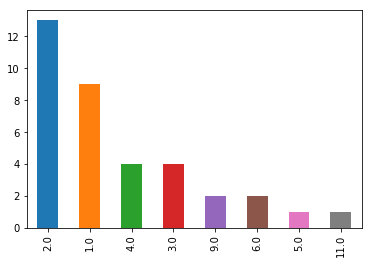

In [177]:
df.abuse_dad.value_counts().plot(kind='bar') #what does this mean?????  What is a 4?  What is a 2?  Is that instances of abuse?
plt.show()

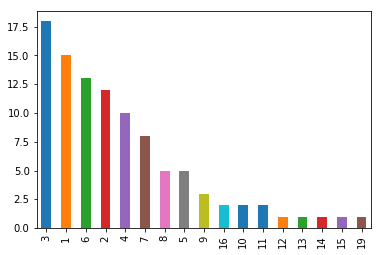

In [179]:
df.abuse_either.value_counts().plot(kind='bar') #what does this mean?????  What is a 4?  What is a 2?  Is that instances of abuse?
plt.show()

In [180]:
df.abuse_asterisk.value_counts() #almost useless, almost all of the cases are abuses

0    94
1     6
Name: abuse_asterisk, dtype: int64

In [181]:
df.Fostered_Parent.value_counts()#almost useless, almost all of the cases are in foster

0    99
1     1
Name: Fostered_Parent, dtype: int64

In [182]:
df.Fostered_asterisk.value_counts()

1    55
0    45
Name: Fostered_asterisk, dtype: int64

[]

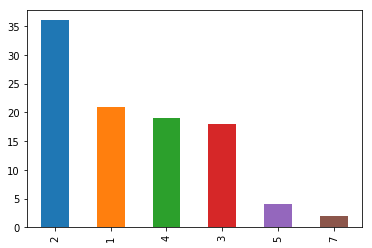

In [184]:
df.Kids_In_Home.value_counts().plot(kind='bar')
plt.plot()

[]

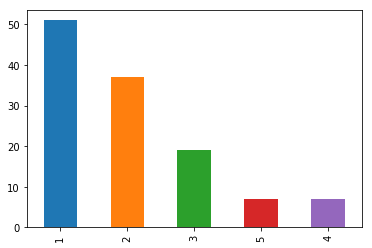

In [194]:
fig, ax =plt.subplots()
df.Staff_Before_Reun.value_counts().plot(kind='bar')
df.Staff_After_Reun.value_counts().plot(kind='bar')
plt.plot()

[]

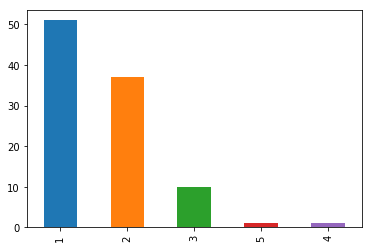

In [189]:
df.Staff_After_Reun.value_counts().plot(kind='bar')
plt.plot()

In [187]:
df.FR_team.value_counts()

0    71
1    29
Name: FR_team, dtype: int64

In [195]:
df.columns

Index(['Reentered', 'OriginalRow', 'dupe_caseNum', 'Age_Youth',
       'A_Remove_Date', 'B_Reunion_Date', 'LOS_Before_Reunion_TOTAL',
       'LOS_Before_Reunion_IMMED', 'DC_reason', 'C_Reenter_Date',
       'LOS_Before_Reenter', 'Age_Parent', 'Married_Parent', 'SA_either',
       'SA_mom', 'SA_dad', 'SA_asterisk', 'abuse_either', 'abuse_mom',
       'abuse_dad', 'abuse_asterisk', 'Fostered_Parent', 'Fostered_asterisk',
       'Kids_In_Home', 'Staff_Before_Reun', 'Staff_After_Reun', 'FR_team',
       'Plmt_Type', 'Comments'],
      dtype='object')

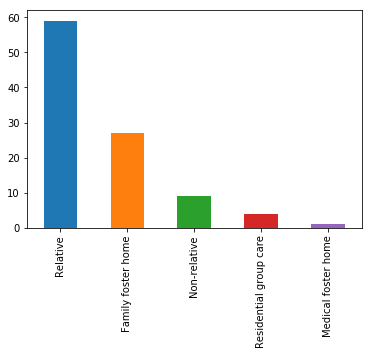

In [197]:
df.Plmt_Type.value_counts().plot(kind='bar')
plt.show()

In [199]:
df.Comments.value_counts()

*FFA indicates that the mother and father both denied any abuse/neglect as children.                                                                                                                                                                                                        16
*FFA indicates that the mother denied any abuse/neglect as a child.                                                                                                                                                                                                                          6
*FFA indicates that the mother was said to be involved with the Dept as a child however it is unknown if she was in foster care.                                                                                                                                                             4
*Allegations of Substance Abuse were Not Substantiated.                                                                                    

## General thoughts 

Looking at the data, while there are not many cases of re-admissions, there arn't many cases at all.  

# Model Building